In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import pickle
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

Loading the Dataset:

In [2]:
df=pd.read_csv("Avacado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.head()  #First 5 data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.tail() #last 5 data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
df.sample(5)  #checking random 5 data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
13906,49,17-01-2016,1.66,4137.60,147.20,2088.92,436.70,1464.78,1260.66,204.12,0.00,organic,2016,RaleighGreensboro
9002,8,28-01-2018,1.34,548587.07,125676.32,178484.53,599.03,243827.19,136634.87,106746.35,445.97,conventional,2018,Seattle
10523,45,15-02-2015,1.11,10581.74,244.59,8525.90,89.76,1721.49,250.00,1471.49,0.00,organic,2015,Nashville
10343,21,02-08-2015,1.37,2477.04,4.00,1786.74,0.00,686.30,36.67,649.63,0.00,organic,2015,Louisville
13837,32,15-05-2016,1.61,28745.81,1973.00,24271.37,3.34,2498.10,96.67,2401.43,0.00,organic,2016,Portland


EDA (Exploratory Data Analysis)

In [6]:
# lets check the shape of dataset before the Cleaning 

df.shape

(18249, 14)

Observation: there are 18249 rows and 14 columns are found in dataset

In [8]:
#lets check the column names in data set

df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
#Checking of info on dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Observation: All columns show no null values, as the counts are equal in all. 
Additionally, there are three types of data: 1. float, 2. object, and 3. int.

In [9]:
#Checking the statistical values

df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Observation:

Multiple Columns have Outliers

The mean and median value of most of the column are same and the STD and mean are very close to each other.

In [10]:
#Checking the Null values in dataset

df.isnull().sum()


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<Axes: >

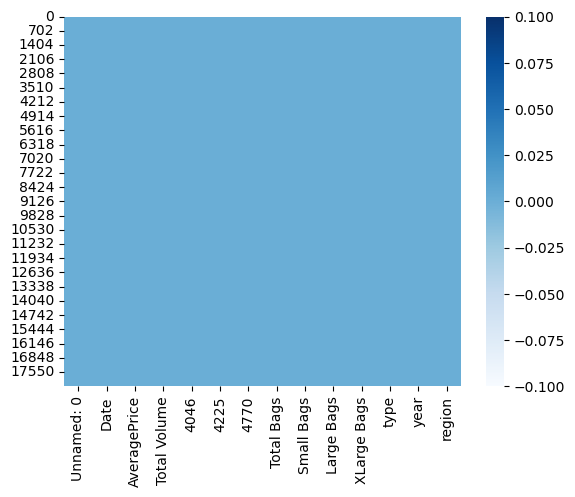

In [11]:
#Checking the Null values as Visual way with heatmap 

sns.heatmap(df.isnull(),cmap='Blues')

Observation: there are 0 null values in dataset, checked in mathematical and Visual way

In [12]:
#Checking on Duplicates in Dataset

df.duplicated().sum()

0

Observation: There 0 Duplicated found in Dataset

In [13]:
#create saperate columns for date, months

df['Date'] = pd.to_datetime(df['Date'])

# Create separate columns for year, month, and day
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [14]:
#Dropping the unwanted columns

#Here Unnamed and date columns is being dropped as it doesnt affect the Anbalysis
df.drop(['Unnamed: 0','Date'], axis=1, inplace=True)

In [15]:
#lets check the Columsn which we have now

df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'month', 'day'],
      dtype='object')

In [16]:
# value counts of type
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

# Data Visualization:

<Axes: xlabel='year', ylabel='AveragePrice'>

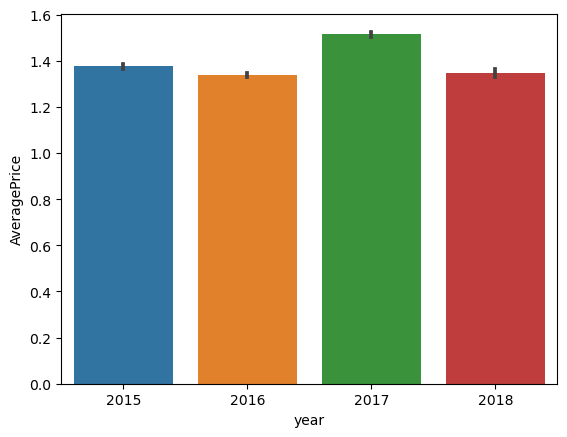

In [17]:
#Checking the Averageprice by year

sns.barplot(x='year',y='AveragePrice',data=df)

Observation: Average price of Avocado is more in year 2017

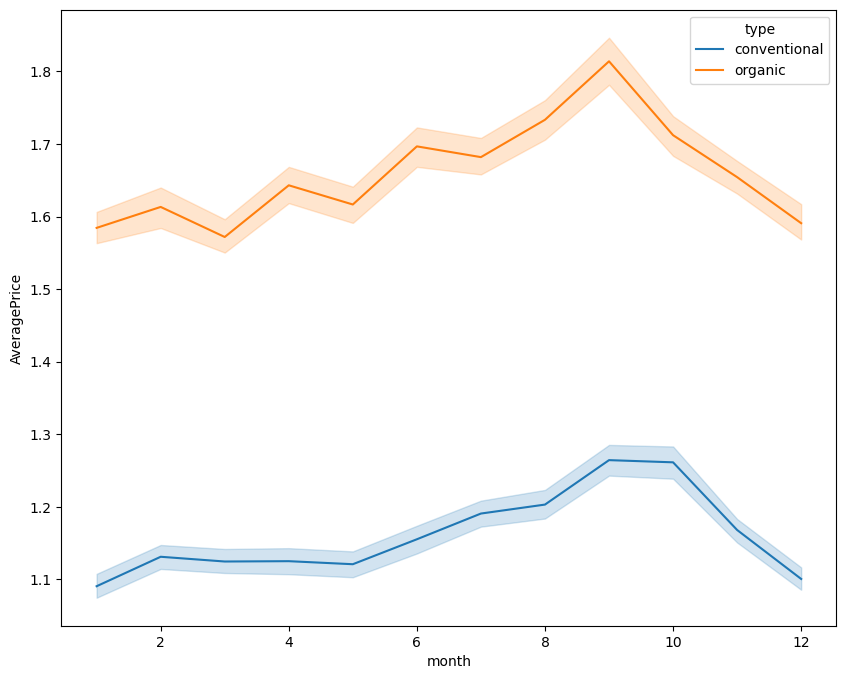

In [18]:
plt.figure(figsize=(10,8))
sns.lineplot(x='month',y='AveragePrice',data=df,hue='type')
plt.show()

Observation:
There is a spike in the 8th to 10th months

Observation:
    
Average price column is normally distributing over the histogram.
Rest of the data are not much varying in term of numbers, so they are almost left skewed data
To make the column as normal distributed we can use different methods, but I am using numPy log to make the skew values as normal distributed.

In [19]:
#Separting the numerical to check the outliers in dataset

numerical_columns = df.select_dtypes(include='number').columns

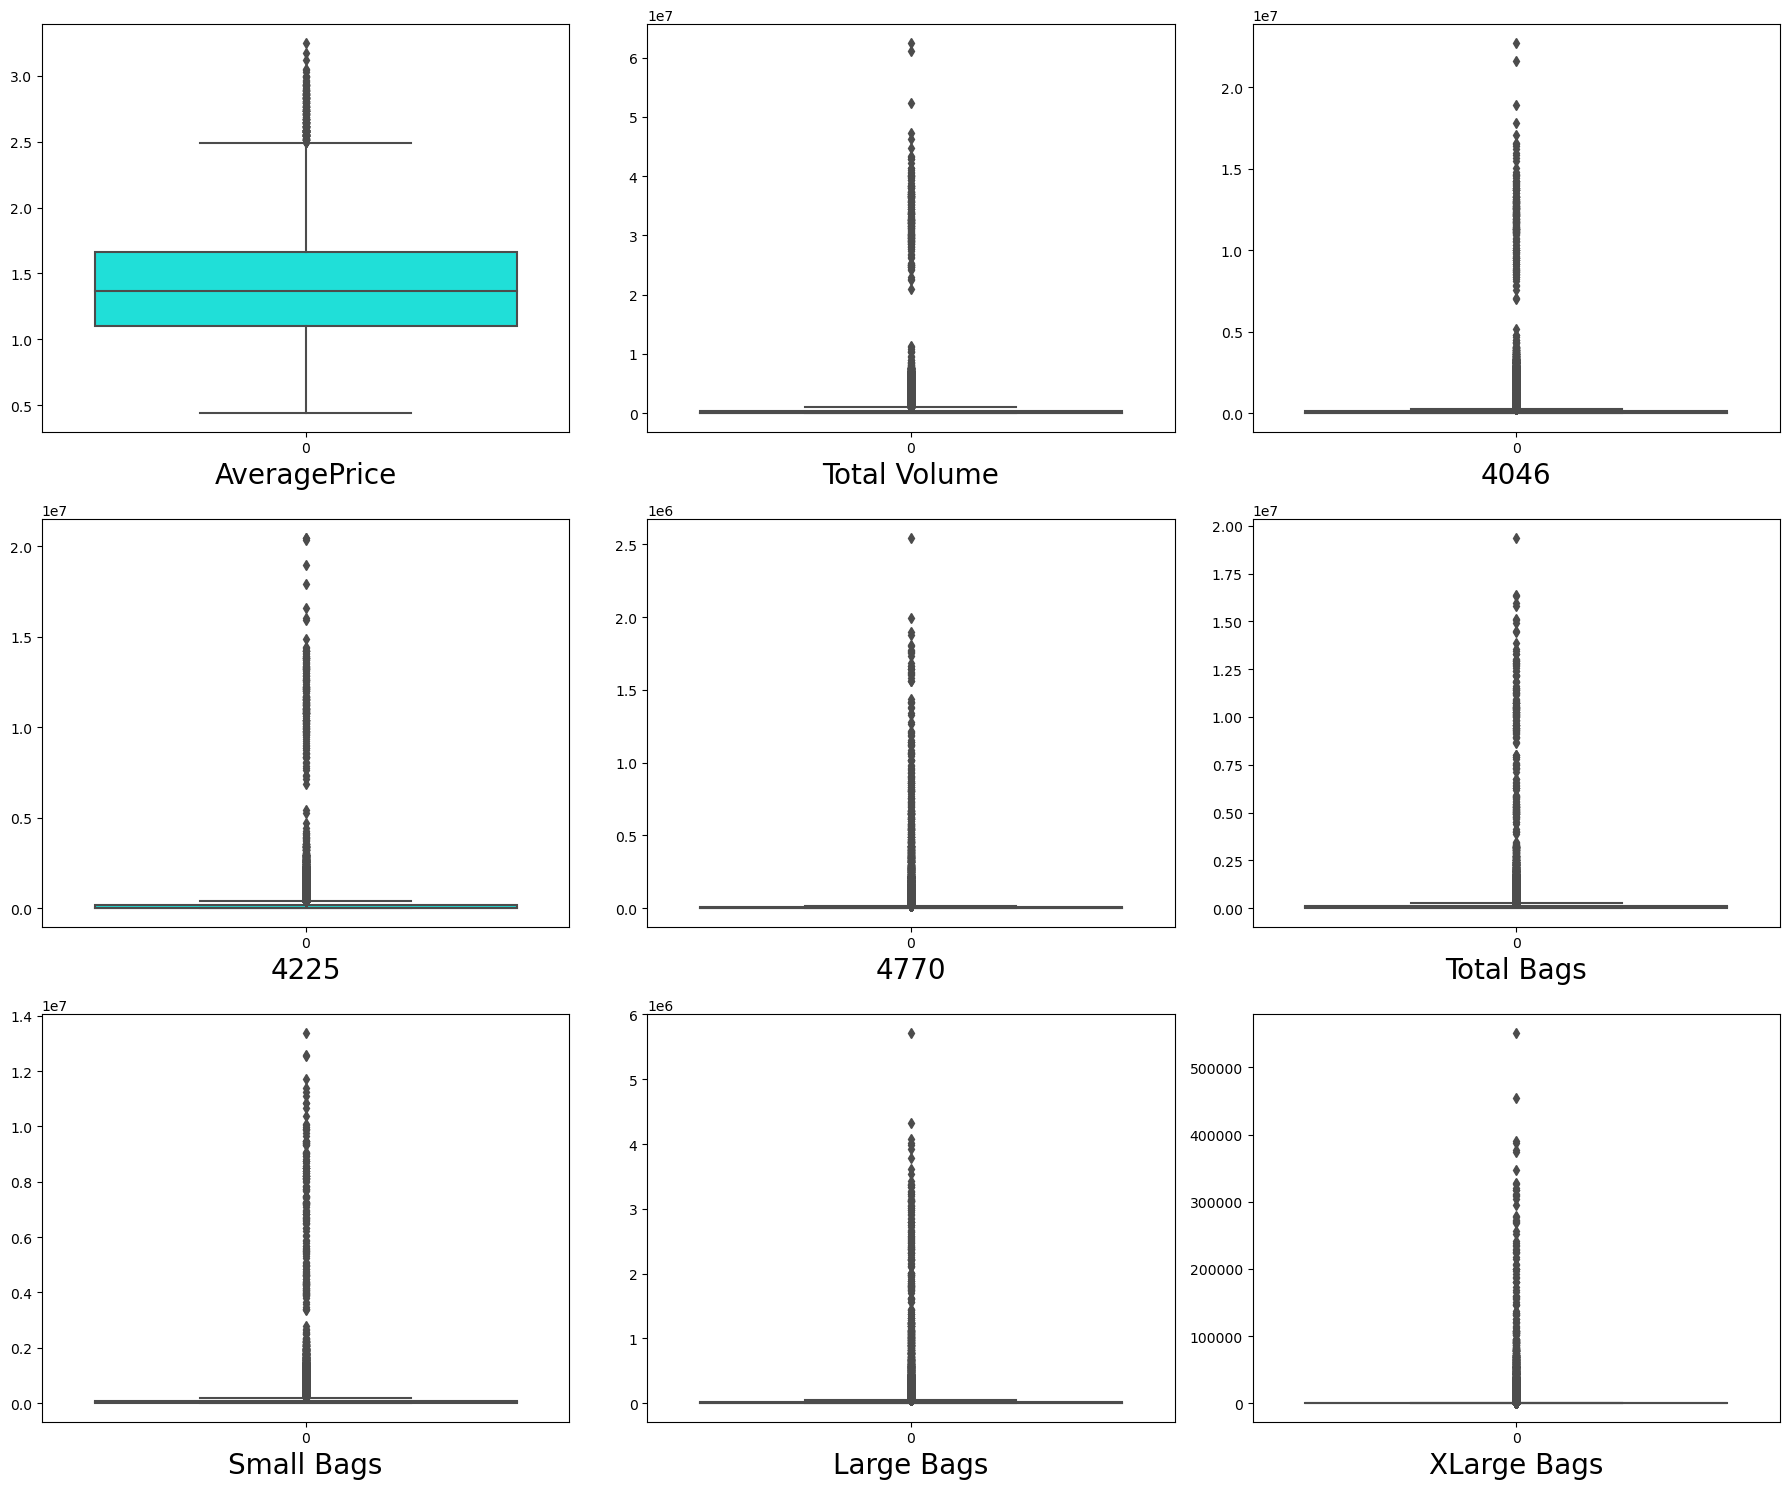

In [20]:
#lets Check the Outliers

plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in numerical_columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

<Axes: xlabel='AveragePrice', ylabel='type'>

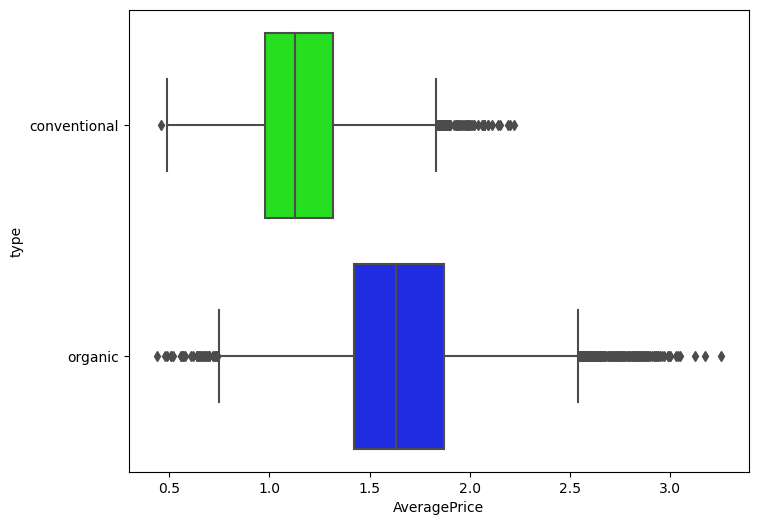

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'hsv')

Observation:
    
We can see that Average Price of Organic Avocado is higher than Conventional Avocado.

Oraganic Avocado is 43% more costlier than conventional Avacado.

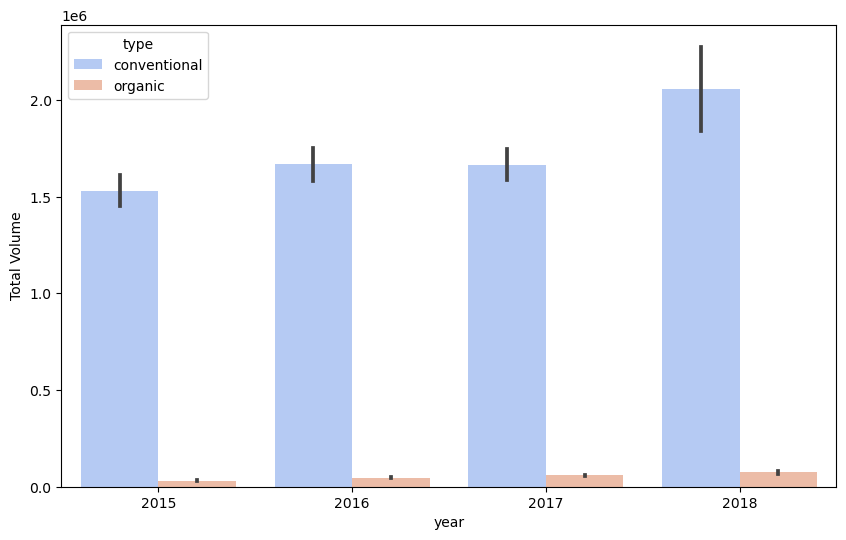

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Total Volume', hue='type',data=df, palette='coolwarm',ci=68)
plt.show()

In [23]:
pd.crosstab([df.type,df.year],df.AveragePrice, margins= True).style.background_gradient(cmap='summer_r')

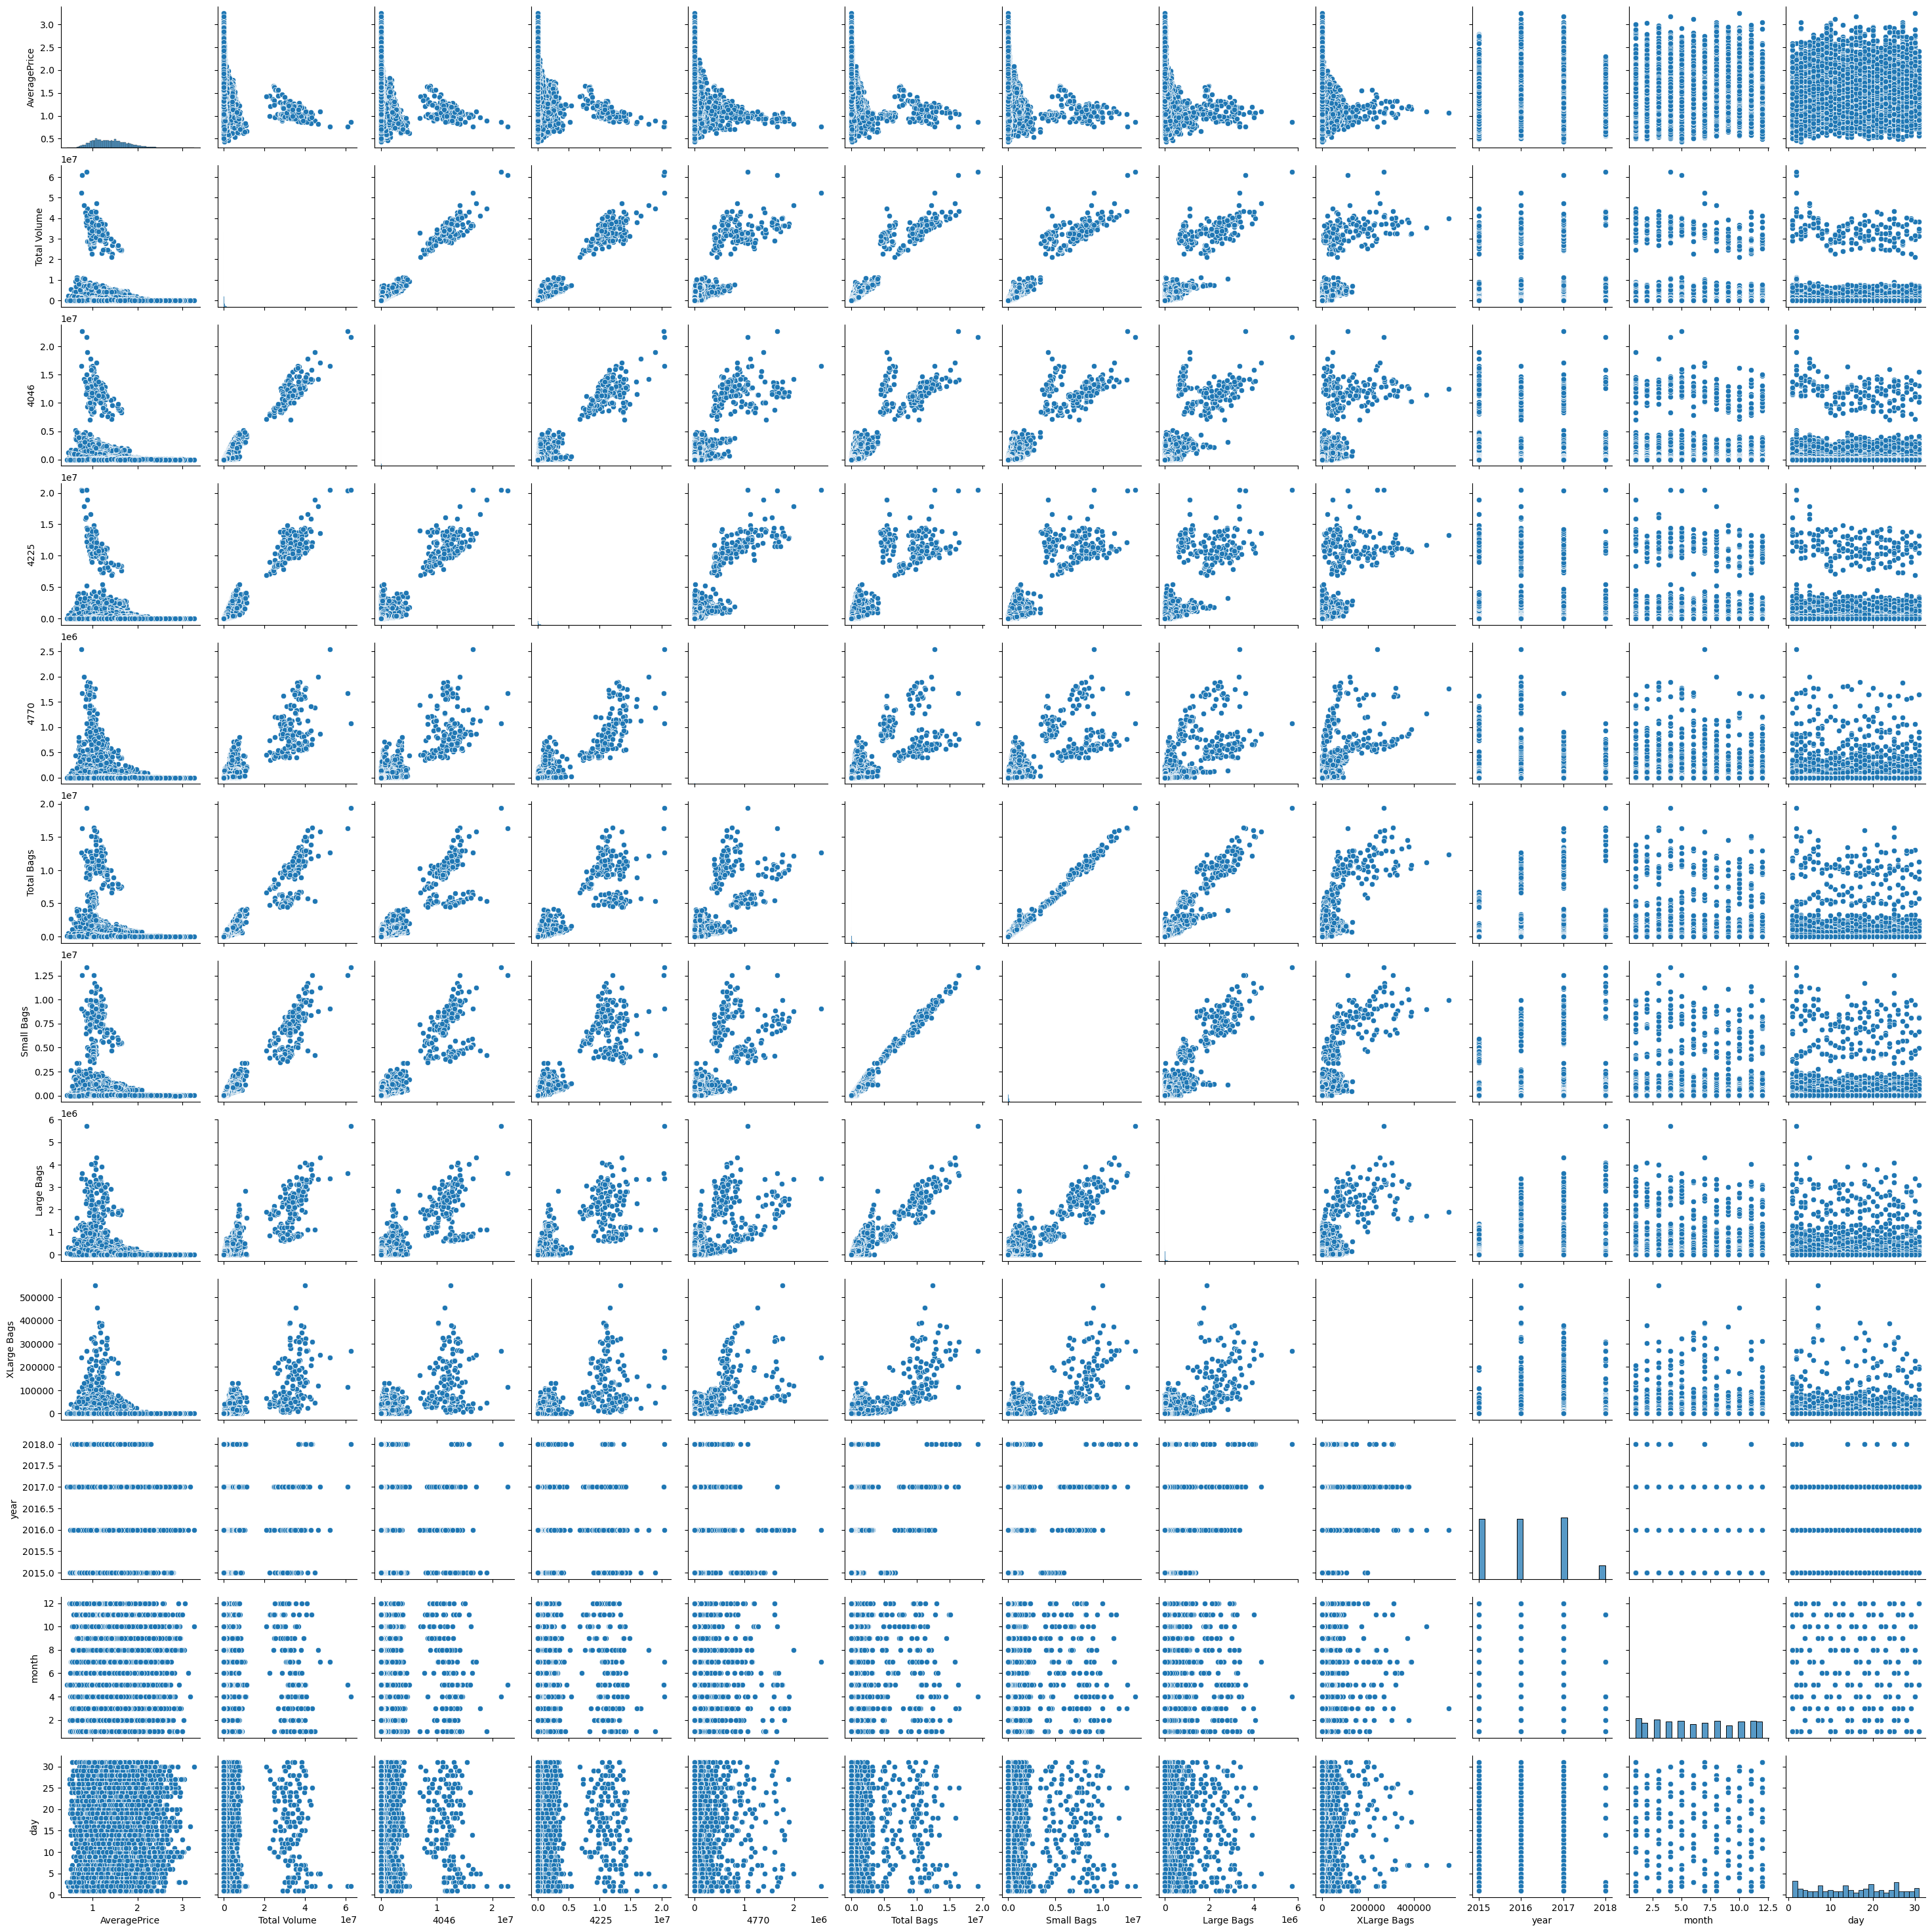

In [24]:
sns.pairplot(df)

Observation:
Oraganic Avocado is 40-50% costlier than conventional avacado.

Avacodo got price hike in year 2017 as result of some reason may be inflation,shortage, more wages.

Except 2017 each year their is incresase in price of avacado.

In [25]:
# Checking unique values and Yearwise total No of sale entry
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

Observation:
    
In first sight we can see in period of Augest to October price high & in that same time period sales order are minimum.

Opposite of it true in duration of Jan to March.

This variation applicable to conventional type while we cannot find such any relation in case of Organic avacado.

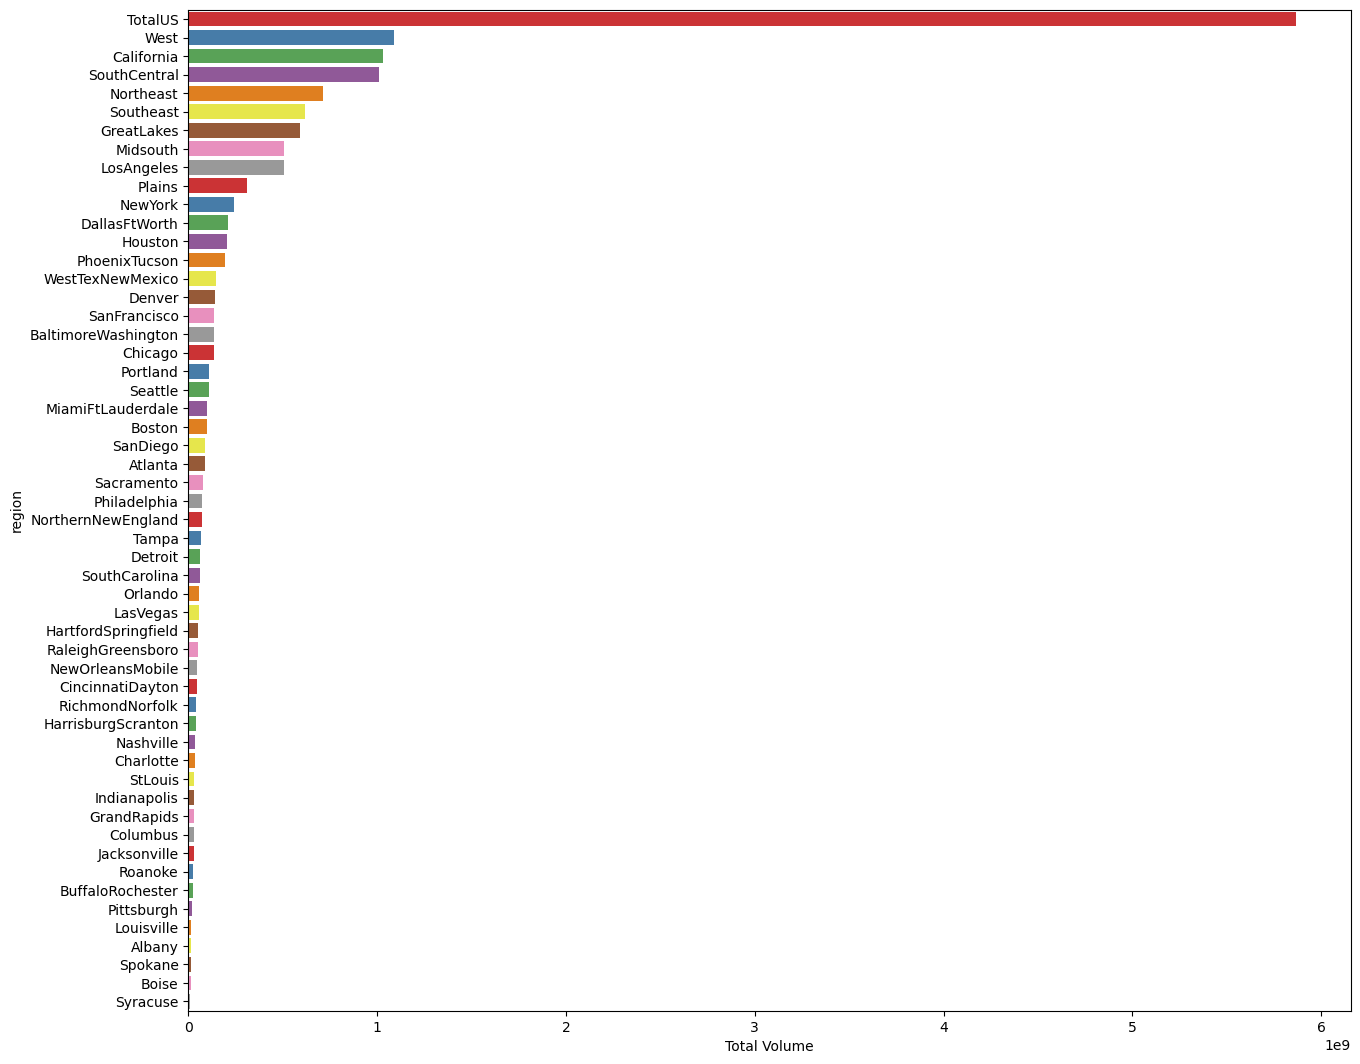

In [26]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set1")
plt.show()

Observation:
    
Maximum sales Volume is in South Central While Minimum Sales Volume is in Syracuse.

Maximum Average Price is in SanFrancisco and Minimum Average Sale price is in Houston

Text(0.5, 1.0, 'Correlation Factors Heat Map')

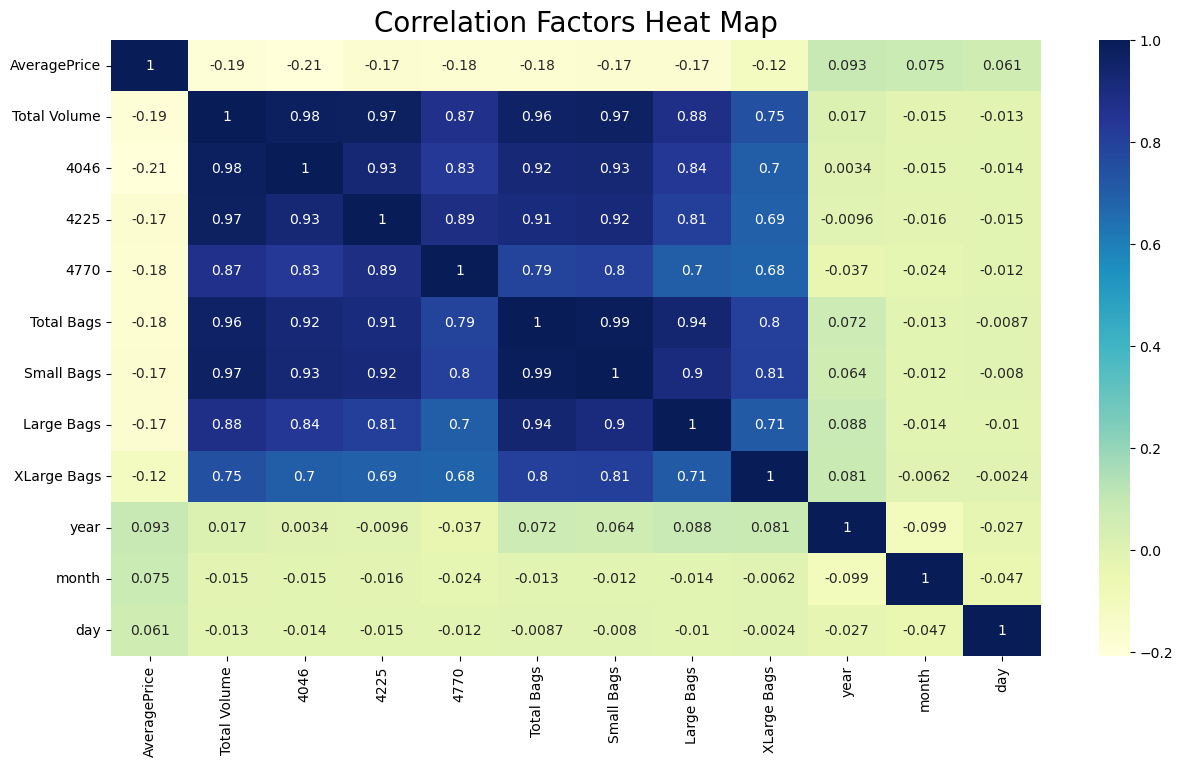

In [27]:
#Heatmap

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

# Data Cleaning

In [28]:
#First we Encode the Categorical data

le = LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [29]:
#Remove the Outliers from datset with Zscore

z = np.abs(zscore(df))
threshold = 3
df = df[(z<3).all(axis = 1)]

In [30]:
#Checking the Dataset after removing the outliers

df.shape

(17651, 14)

In [31]:
Begining_rows = 18249
Current_rows= 17651

loss_percentage = ((Begining_rows - Current_rows) / Begining_rows) * 100

print("Data loss percentage is",loss_percentage,"%")

Data loss percentage is 3.276891884486821 %


In [32]:
#creatiung a new dataset lets do the Analysis based on region and AveragePrice 

df1=df  #here df1 will be used for region prediction

In [33]:
#First wiull start the prediction based on Region

#correlation with target column
correlation_with_quality = df1.corr()['region'].abs().sort_values(ascending=False)
print(correlation_with_quality)

region          1.000000
Large Bags      0.127635
4046            0.119067
4770            0.095972
Total Bags      0.085892
Total Volume    0.076676
Small Bags      0.065976
XLarge Bags     0.044338
type            0.018409
4225            0.011002
year            0.004417
AveragePrice    0.003242
month           0.000604
day             0.000235
Name: region, dtype: float64


Observation: here Day Month is vary less correlated with target column so we will delete them

In [34]:
#Will be dropping day and Month it doesnt affect the prediction

df1.drop(columns=['day','month'],axis=1, inplace=True)

In [35]:
#Checking column
df1.head(1)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0


In [36]:
#checking correlation
df1_corr = df1.corr()
df1_corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.332056,-0.333577,-0.243988,-0.243465,-0.297323,-0.275771,-0.270915,-0.152669,0.613150,0.091704,-0.003242
Total Volume,-0.332056,1.000000,0.876307,0.871592,0.647518,0.912184,0.905648,0.640642,0.513741,-0.415476,-0.004866,0.076676
4046,-0.333577,0.876307,1.000000,0.565118,0.492127,0.727981,0.706800,0.561060,0.415432,-0.341376,-0.034636,0.119067
4225,-0.243988,0.871592,0.565118,1.000000,0.620221,0.757786,0.778761,0.451711,0.392030,-0.383138,-0.040234,0.011002
4770,-0.243465,0.647518,0.492127,0.620221,1.000000,0.557980,0.571512,0.323747,0.495976,-0.321809,-0.082054,-0.095972
Total Bags,-0.297323,0.912184,0.727981,0.757786,0.557980,1.000000,0.978213,0.746946,0.581690,-0.378205,0.103442,0.085892
Small Bags,-0.275771,0.905648,0.706800,0.778761,0.571512,0.978213,1.000000,0.593155,0.597700,-0.367593,0.086639,0.065976
Large Bags,-0.270915,0.640642,0.561060,0.451711,0.323747,0.746946,0.593155,1.000000,0.296864,-0.286813,0.119543,0.127635
XLarge Bags,-0.152669,0.513741,0.415432,0.392030,0.495976,0.581690,0.597700,0.296864,1.000000,-0.263734,0.108209,-0.044338
type,0.613150,-0.415476,-0.341376,-0.383138,-0.321809,-0.378205,-0.367593,-0.286813,-0.263734,1.000000,0.003867,0.018409


In [37]:
#variance_inflation_factor


vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

,VIF,Features
0,2.398199e+01,AveragePrice
1,4.976834e+08,Total Volume
2,8.726684e+07,4046
3,7.503502e+07,4225
4,5.280831e+05,4770
5,2.333471e+13,Total Bags
6,1.518921e+13,Small Bags
7,1.478044e+12,Large Bags
8,7.091814e+09,XLarge Bags
9,3.665187e+00,type


In [38]:
df1.drop(columns=['year'],axis=1, inplace=True)

In [39]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

,VIF,Features
0,6.447342e+00,AveragePrice
1,4.976468e+08,Total Volume
2,8.726039e+07,4046
3,7.502949e+07,4225
4,5.280419e+05,4770
5,2.333471e+13,Total Bags
6,1.518921e+13,Small Bags
7,1.478044e+12,Large Bags
8,7.091724e+09,XLarge Bags
9,3.433690e+00,type


In [40]:
#Checking Skewness

df1.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
dtype: float64

In [41]:
#Handling skewness by log method

for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

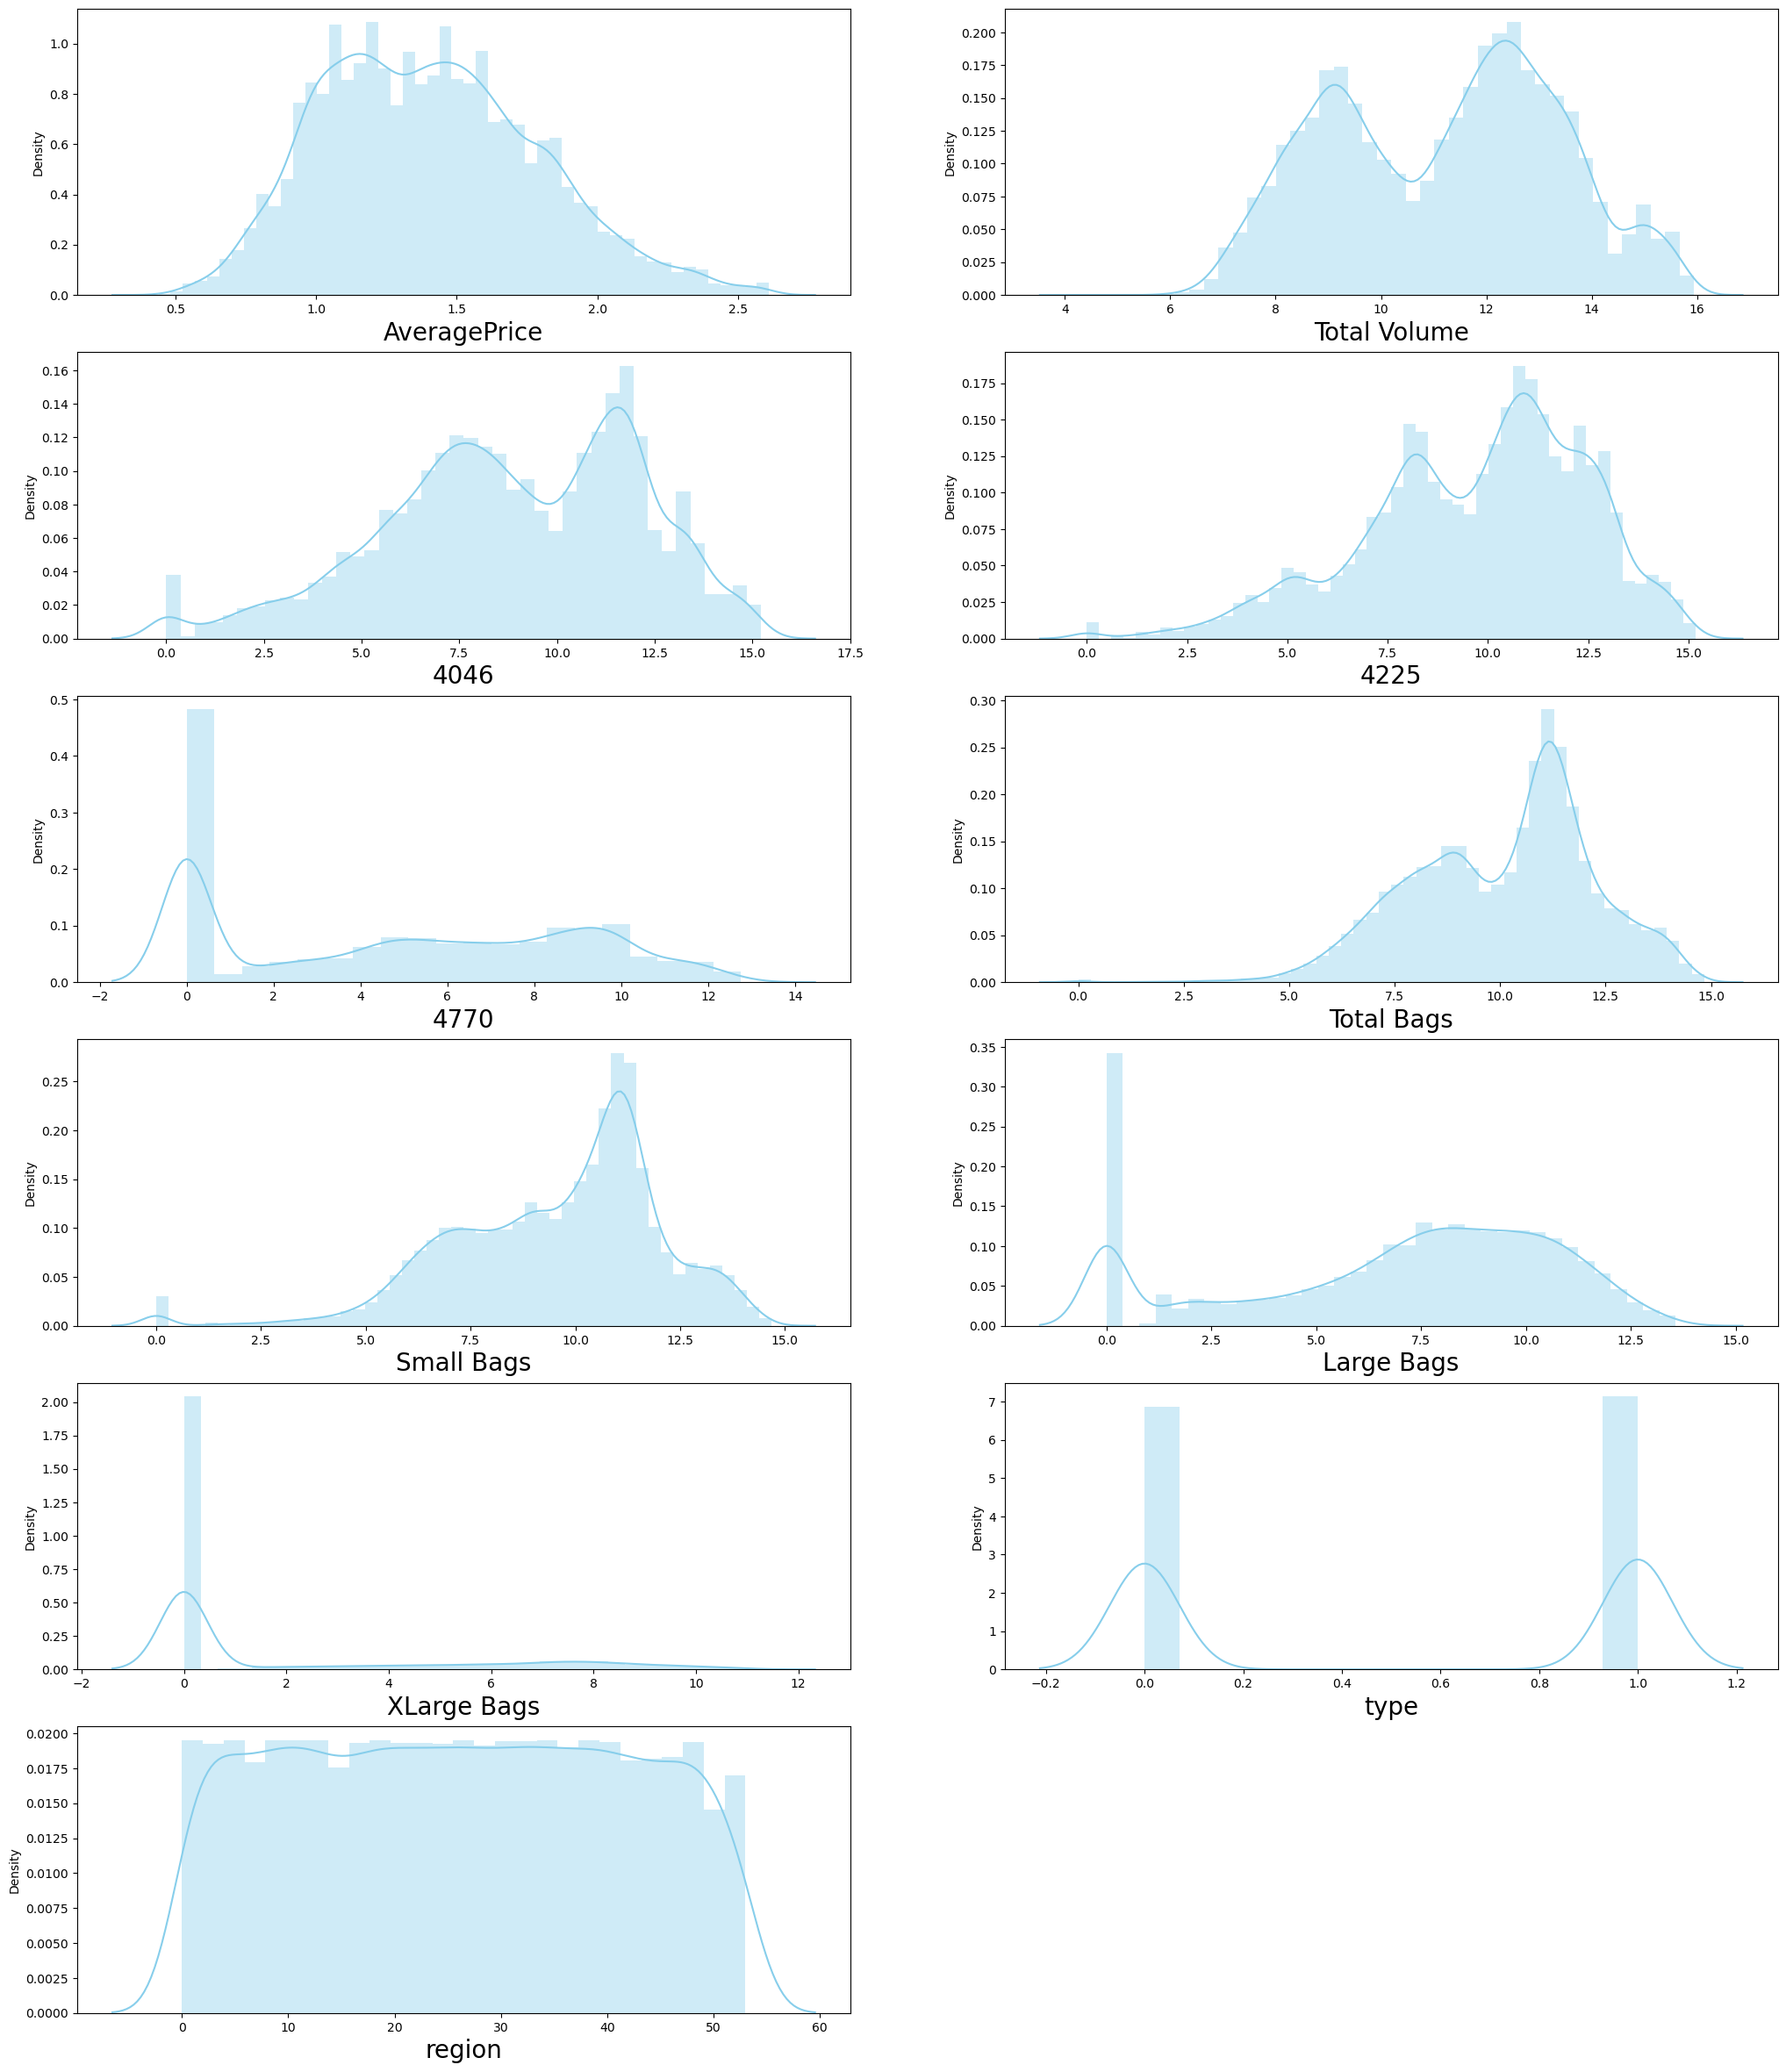

In [42]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df1.columns:
    if plotnumber <=12:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df1[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

In [43]:
#Separating feature and target column

X1 = df1.drop("region",axis=1)
y1 = df1["region"]

In [44]:
#Scaling Data using StandardScaler

std=StandardScaler()
X1 = pd.DataFrame(std.fit_transform(X1), columns=X1.columns)

In [45]:
#Train test split

X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.22,random_state=42)

In [46]:
#Model evaluation


def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    return accuracy, precision, recall, f1

models = {
    "Random_Forest": RandomForestClassifier(),
    "Decision_Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNeighbors_Classifier": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

trained_model_list = []
model_list = []
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make Predictions
    y_pred = model.predict(X_test)

    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    accuracy_list.append(accuracy)

    print('=' * 35)
    print('\n')

Random_Forest
Model Training Performance
Accuracy: 0.880020597322348
Precision: 0.8812820455089959
Recall: 0.880020597322348
F1 Score: 0.8798997636549811


Decision_Tree
Model Training Performance
Accuracy: 0.7772914521112255
Precision: 0.780346372734052
Recall: 0.7772914521112255
F1 Score: 0.7774512590873814


SVM
Model Training Performance
Accuracy: 0.7600411946446962
Precision: 0.7639497259360511
Recall: 0.7600411946446962
F1 Score: 0.7571647324992786


KNeighbors_Classifier
Model Training Performance
Accuracy: 0.8208032955715757
Precision: 0.826055900834659
Recall: 0.8208032955715757
F1 Score: 0.8209028206471756


XGBoost
Model Training Performance
Accuracy: 0.8643151390319258
Precision: 0.8673623503526854
Recall: 0.8643151390319258
F1 Score: 0.8650336164910158




In [48]:
#After seeing all the accuracy it is found that random forest is giving high accuracy
#Here RandomForestClassifier is giving highest accuracy so we will do hypermetertuning on it to increase its accuracy

In [47]:
param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [None, 20], 
    'min_samples_leaf': [1, 4],    
    'max_features': ['auto', 'sqrt'],
}

# Create the Random Forest Classifier
rf = RandomForestClassifier()

# Initialize Grid Search with the classifier and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1,verbose=2)

# Perform the Grid Search on your training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Test Set Accuracy: 0.8823377960865088


after hyper parameter tuning accuracy is 66%

# Now We will predict based on Average price

In [49]:
#correlation with target column
correlation_with_quality = df.corr()['AveragePrice'].abs().sort_values(ascending=False)
print(correlation_with_quality)

AveragePrice    1.000000
type            0.613150
Total Volume    0.580302
Total Bags      0.566986
4046            0.537346
4770            0.495013
Small Bags      0.474088
Large Bags      0.470679
4225            0.435384
XLarge Bags     0.362711
region          0.003242
Name: AveragePrice, dtype: float64


Here i can see that day and region is low correlated with target column so i will delete both of them

In [50]:
df.drop(columns=['region'],axis=1, inplace=True)

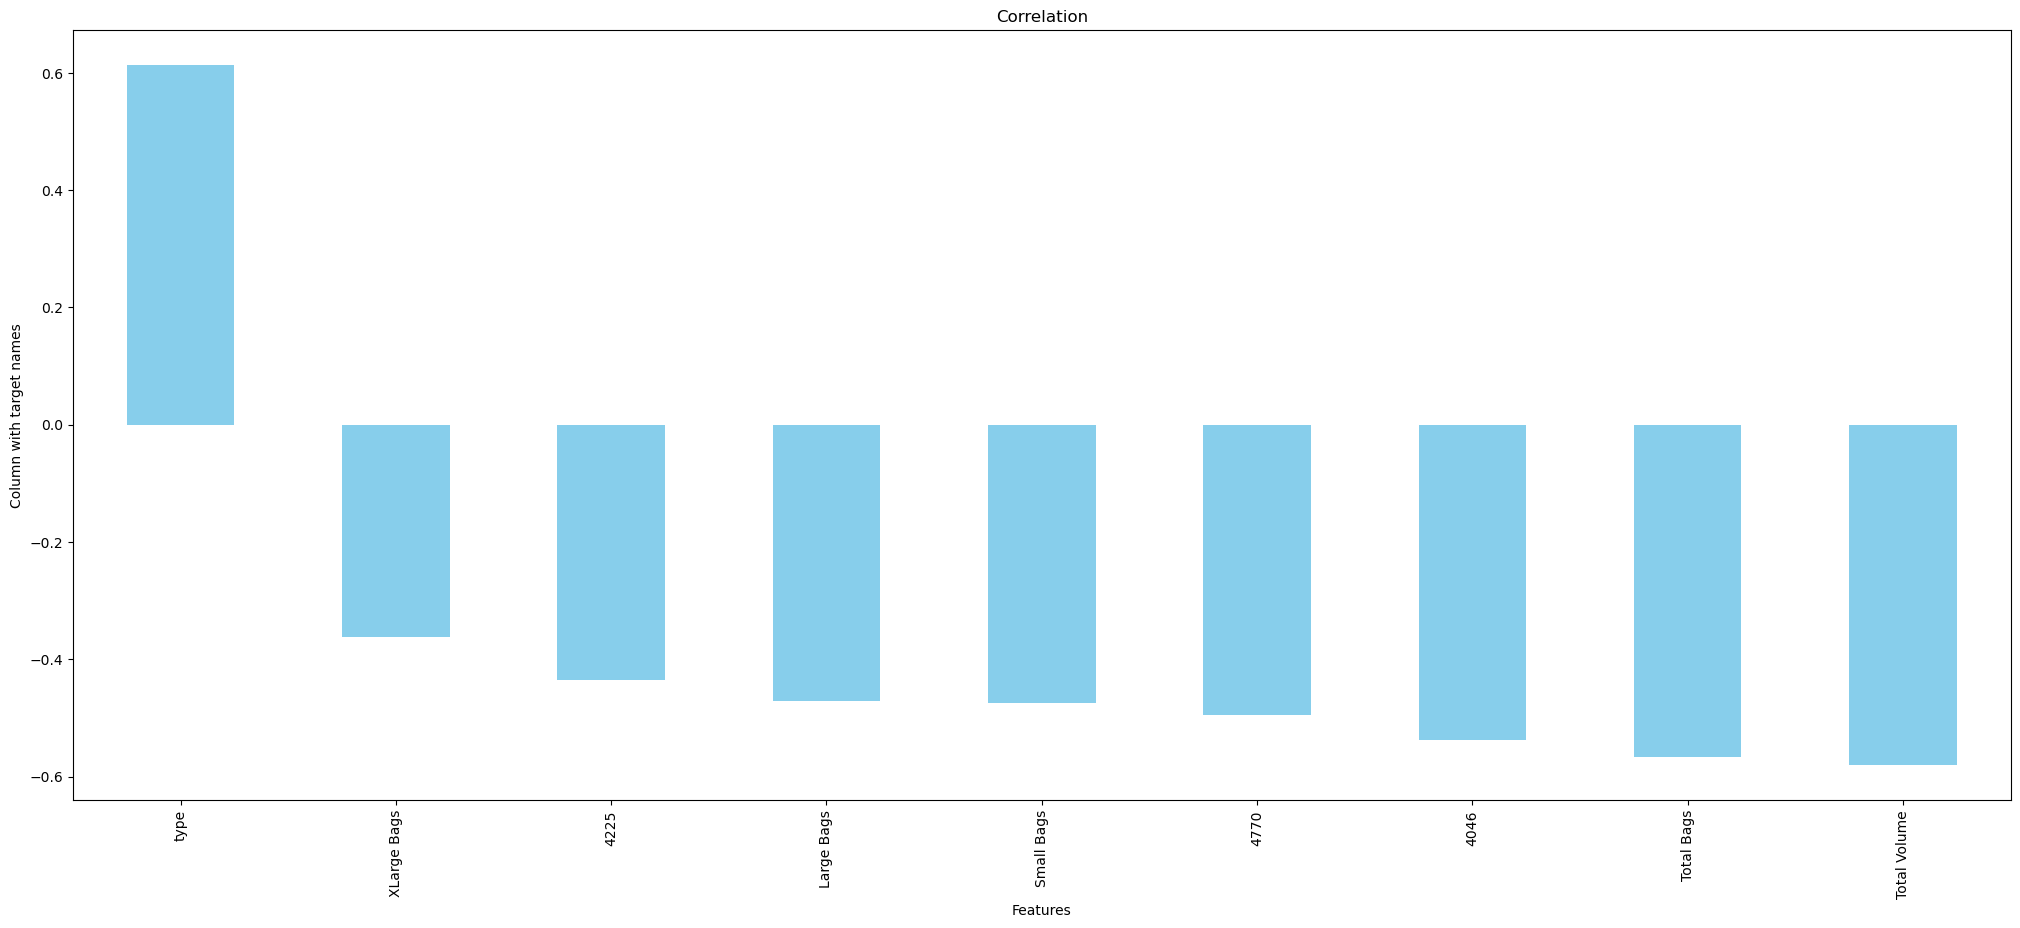

In [51]:
plt.figure(figsize =(25, 10))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

In [52]:
#Checking Correlation of Column with Column

df_corr = df.corr()
df_corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
AveragePrice,1.000000,-0.580302,-0.537346,-0.435384,-0.495013,-0.566986,-0.474088,-0.470679,-0.362711,0.613150
Total Volume,-0.580302,1.000000,0.875354,0.900066,0.818046,0.928706,0.863335,0.644861,0.614247,-0.800140
4046,-0.537346,0.875354,1.000000,0.739737,0.725446,0.765438,0.716691,0.552370,0.539334,-0.713862
4225,-0.435384,0.900066,0.739737,1.000000,0.775653,0.771848,0.696343,0.586721,0.542787,-0.730539
4770,-0.495013,0.818046,0.725446,0.775653,1.000000,0.750909,0.723369,0.525201,0.603807,-0.778713
Total Bags,-0.566986,0.928706,0.765438,0.771848,0.750909,1.000000,0.920842,0.685630,0.584338,-0.722171
Small Bags,-0.474088,0.863335,0.716691,0.696343,0.723369,0.920842,1.000000,0.486811,0.551761,-0.701637
Large Bags,-0.470679,0.644861,0.552370,0.586721,0.525201,0.685630,0.486811,1.000000,0.420044,-0.481150
XLarge Bags,-0.362711,0.614247,0.539334,0.542787,0.603807,0.584338,0.551761,0.420044,1.000000,-0.623012
type,0.613150,-0.800140,-0.713862,-0.730539,-0.778713,-0.722171,-0.701637,-0.481150,-0.623012,1.000000


In [53]:
#Here i am writng function for finding thos columns who are highly correlated with each other

correlation_threshold = 0.8
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [54]:
features_to_drop

{'4046', '4225', '4770', 'Small Bags', 'Total Bags', 'type'}

In [55]:
#These columns are highly correlated with each other
df.drop(columns=['4046','4225','Small Bags','Total Bags'],axis=1, inplace=True)

In [56]:
#Variance inflation factor

vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,19.380645,AveragePrice
1,33.266480,Total Volume
2,8.420386,4770
3,7.921898,Large Bags
4,2.485753,XLarge Bags
5,6.561892,type


We will drop Year as it is less than 20% correlated with target feature and For most of input features correlated with less than 10%.

# Skewness of features

In [57]:
df.skew()

AveragePrice    0.377432
Total Volume   -0.049950
4770            0.068532
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
dtype: float64

In [58]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

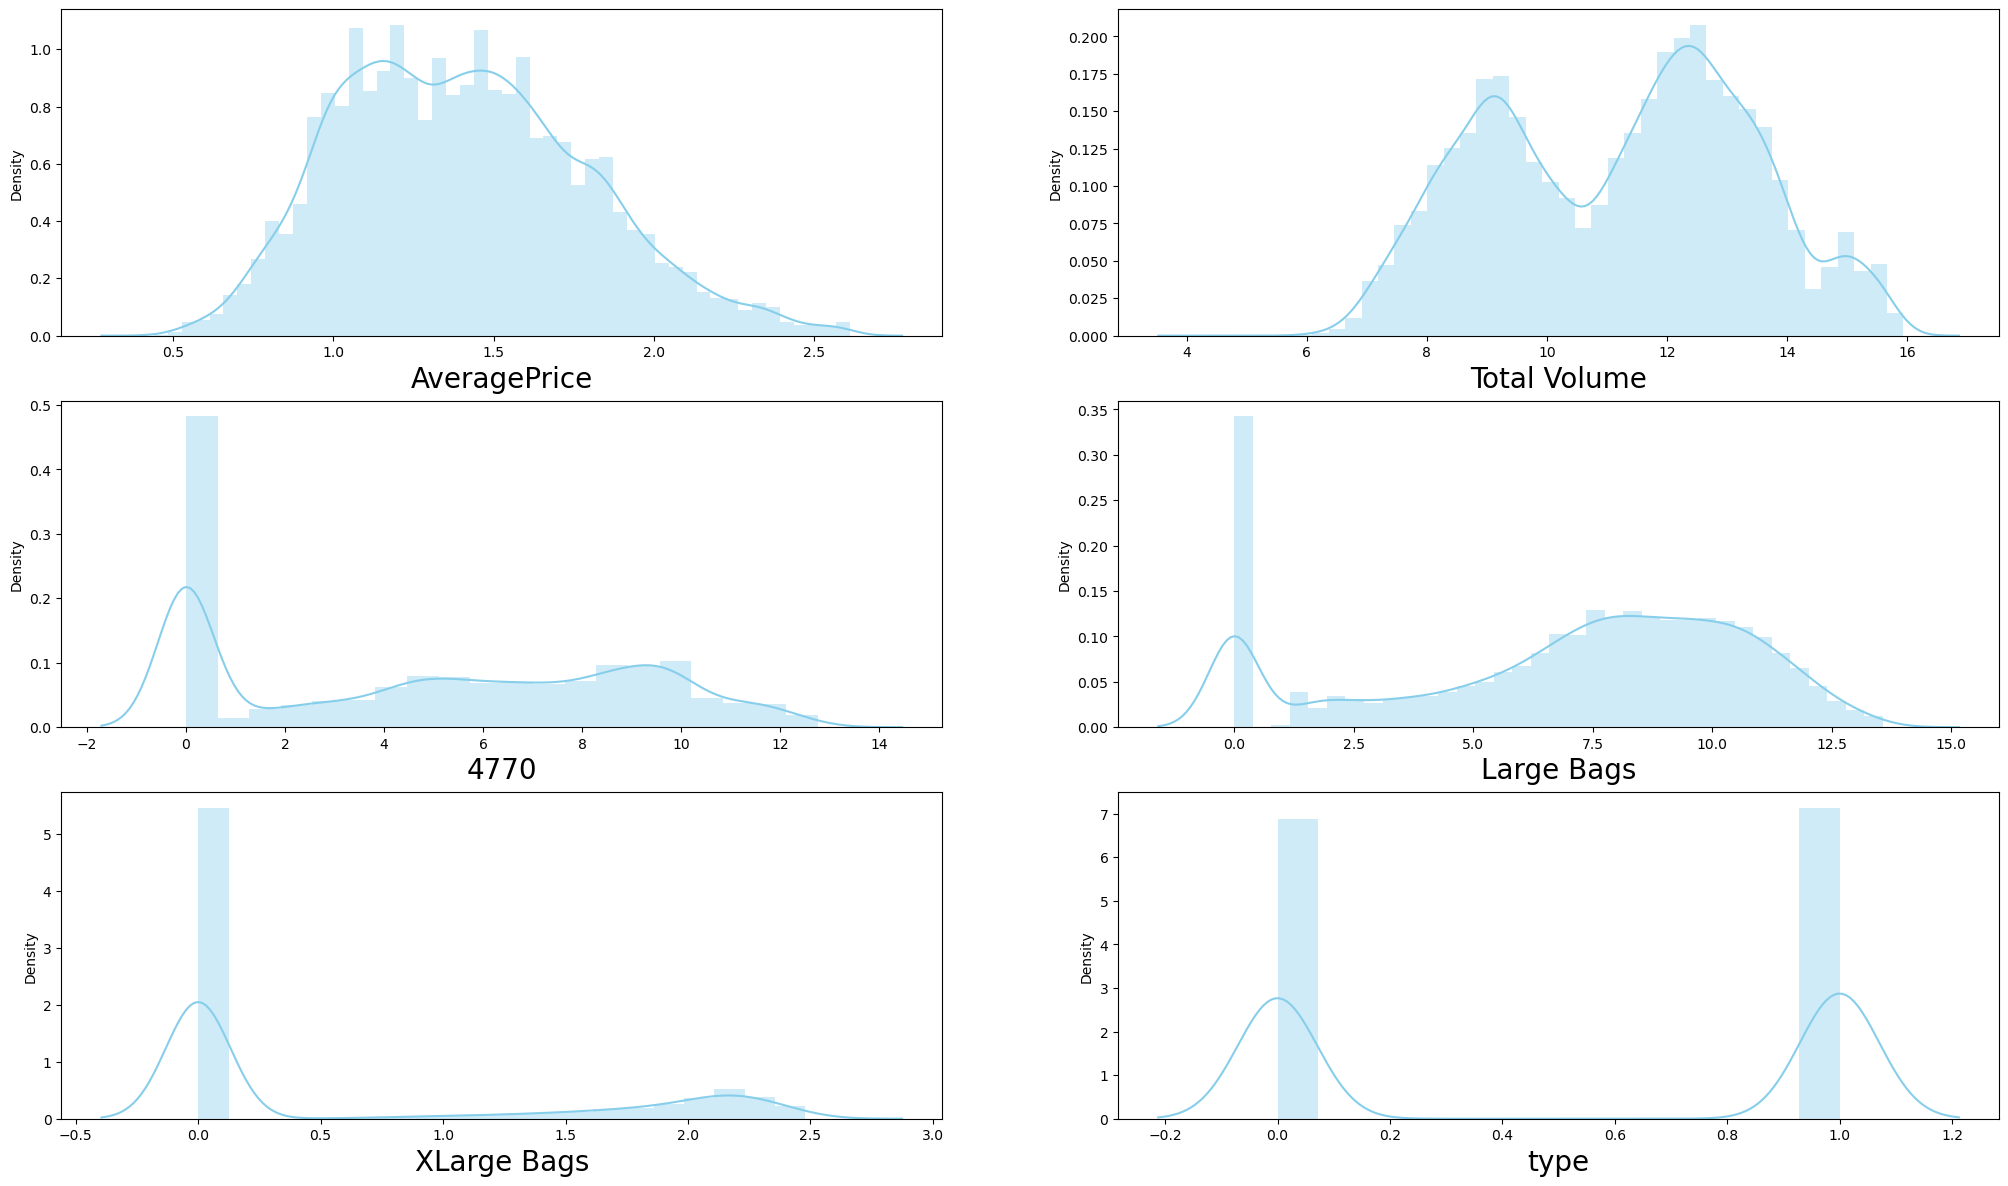

In [59]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df.columns:
    if plotnumber <=12:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

In [60]:
#Splitting the columns into feature and label

X = df.drop("AveragePrice",axis=1)
y = df["AveragePrice"]

In [61]:
#Scaling Data using StandardScaler

std=StandardScaler()
X = pd.DataFrame(std.fit_transform(X), columns=X.columns)

In [62]:
#Splitting the data for training and testing
#Finding bset random state

maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.22, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.44904471255775336 on Random_state 449


In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=maxRS)

# Model Evaluation

In [64]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [65]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Linear Regression": LinearRegression(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "SGD Regressor": SGDRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "xgb": XGBRegressor()
}

trained_model_list = []
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make Predictions
    y_pred = model.predict(X_test)

    mae,  rmse, r2_square = evaluate_model(y_test, y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2 score", r2_square)

    r2_list.append(r2_square)

    print('=' * 35)
    print('\n')

Random Forest
Model Training Performance
RMSE: 0.24740436180775713
MAE: 0.18153926364572603
R2 score 0.5971658359819085


Decision Tree
Model Training Performance
RMSE: 0.3326859530508668
MAE: 0.23658856848609677
R2 score 0.2715822508083259


SVR
Model Training Performance
RMSE: 0.26814297023844996
MAE: 0.20685150485648948
R2 score 0.52680034103528


Linear Regression
Model Training Performance
RMSE: 0.28933593923494866
MAE: 0.22904833574830605
R2 score 0.44904471255775336


KNeighbors Regressor
Model Training Performance
RMSE: 0.25164275103877015
MAE: 0.1853532440782698
R2 score 0.5832453634953596


SGD Regressor
Model Training Performance
RMSE: 0.28919360768552527
MAE: 0.2289004696093054
R2 score 0.44958663646786556


Gradient Boosting
Model Training Performance
RMSE: 0.2595232250324798
MAE: 0.2028830735812762
R2 score 0.5567343781028017


Bagging Regressor
Model Training Performance
RMSE: 0.2536053494604841
MAE: 0.18722991761071062
R2 score 0.5767193536281565


Lasso
Model Training 

XG Boost is performing well for Averaga price

In [ ]:
#Saving the best model

filename = 'AveragePrice_best_model.pkl'
pickle.dump() open(filename, 'wb'))